In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [2]:
df = pd.read_csv(r'../data/processed/Incapacidades_Empresa_limpio.csv')

In [3]:
plt.style.use('ggplot')  # Puedes añadir esta línea antes de los gráficos para una estética más limpia


In [4]:
import plotly.express as px

top_costes = df.groupby('c.c_colaborador')['costo_total_incapacidad'].sum().nlargest(10).reset_index()

fig1 = px.bar(top_costes, x='c.c_colaborador', y='costo_total_incapacidad',
              title='Top 10 Colaboradores con Mayor Costo por Incapacidades',
              labels={'c.c_colaborador': 'Colaborador', 'costo_total_incapacidad': 'Costo Total ($)'},
              color='costo_total_incapacidad', color_continuous_scale='Blues')

fig1.update_layout(xaxis_title='Colaborador', yaxis_title='Costo Total ($)')

In [6]:
dias_mensuales = df.groupby(['año', 'mes'])['incapacidad_dias'].sum().reset_index()
dias_mensuales['periodo'] = dias_mensuales['año'].astype(str) + '-' + dias_mensuales['mes'].astype(str).str.zfill(2)

fig2 = px.line(dias_mensuales, x='periodo', y='incapacidad_dias',
               title='Días Perdidos por Incapacidades en el Tiempo',
               markers=True, labels={'periodo': 'Mes-Año', 'incapacidad_dias': 'Días Perdidos'})

fig2.update_layout(xaxis_title='Mes-Año', yaxis_title='Días Perdidos')

In [11]:
import altair as alt

top_diag = df.groupby('incapacidad_diagnóstico')['incapacidad_dias'].sum().nlargest(10).reset_index()

fig3 = alt.Chart(top_diag).mark_bar().encode(
    x=alt.X('incapacidad_dias:Q', title='Días Totales'),
    y=alt.Y('incapacidad_diagnóstico:N', sort='-x', title='Diagnóstico'),
    tooltip=['incapacidad_diagnóstico', 'incapacidad_dias']
).properties(title='Top 10 Diagnósticos con Más Días Perdidos')
fig3

alt.Chart(...)

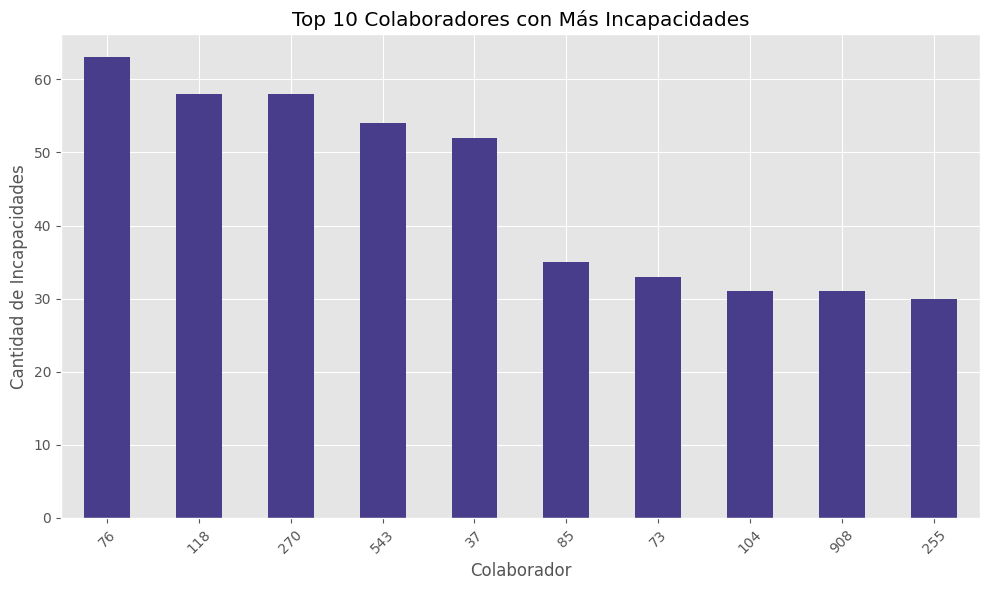

alt.Chart(...)

In [17]:
top_reincidentes = df.groupby('c.c_colaborador')['incapacidades_acumuladas_por_colaborador'].first().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_reincidentes.plot(kind='bar', color='darkslateblue')
plt.title('Top 10 Colaboradores con Más Incapacidades')
plt.xlabel('Colaborador')
plt.ylabel('Cantidad de Incapacidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_reincidentes = df.groupby('c.c_colaborador')['incapacidades_acumuladas_por_colaborador'].first().nlargest(10).reset_index()

fig5 = alt.Chart(top_reincidentes).mark_bar().encode(
    x=alt.X('incapacidades_acumuladas_por_colaborador:Q', title='Cantidad de Incapacidades'),
    y=alt.Y('c.c_colaborador:N', sort='-x', title='Colaborador'),
    tooltip=['c.c_colaborador', 'incapacidades_acumuladas_por_colaborador']
).properties(title='Top 10 Colaboradores con Más Incapacidades')

fig5


In [19]:
fig6 = px.histogram(df, x='dias_promedio_por_incapacidad_colaborador',
                    nbins=30,
                    title='Distribución de Días Promedio por Incapacidad por Colaborador',
                    labels={'dias_promedio_por_incapacidad_colaborador': 'Días Promedio'})

fig6.update_layout(xaxis_title='Días Promedio por Incapacidad', yaxis_title='Frecuencia')


In [22]:
top_ips = df.groupby('ips')['incapacidad_dias'].sum().nlargest(10).reset_index()

fig7 = alt.Chart(top_ips).mark_bar().encode(
    x=alt.X('incapacidad_dias:Q', title='Días Totales'),
    y=alt.Y('ips:N', sort='-x', title='IPS'),
    tooltip=['ips', 'incapacidad_dias']
).properties(title='Top 10 IPS por Días Totales de Incapacidad')

fig7

alt.Chart(...)